# PROJECT 2_TATANIC
by Xaiver J  
2017.12.17

## 1. To Begin With
In this report, I first looked at the data, and made certain cleaning to prepare for later processing. And then, some prescriptive statistics and graphes are presented to better understand these data. Furthermore, I look closer to the ralations ships between survival rate and factors contributing to that, during which certain questions are brought and explorations are made to clearify and answer these questions. And fianlly, a simple summary is made to review the knowledge and works learned before and during this project.  
To better understand the data, I've looked up the event online. (see more click [Titanic](#https://en.wikipedia.org/wiki/RMS_Titanic))  
__NOTE__:   
1. Since this is actually the first full project using python, pandas and jupyter notebook, there are many questions I still cannot solve, though most of the problems I met during the process were solved by the forum 'stackoverflow'. So I would use 'Q+number' to denote my problems that still exist, and hoping you can help me with.   
2. All the work was done in python 3 kernel.  
Thank you! 

## 2. Data Wrangling

### 2.1 Data Aquisition

In [1]:
import unicodecsv   
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# use a function to read in the data.
def read_csv(filename):             
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
# set the name overall_data for the whole data acquired without any processing of the dataframe.
data_original_df = pd.read_csv('titanic-data.csv')      

In later work I disconvered that under certain circumstances to count the frequency of a certain grouped data is quite inconvenient using '.size()' or 'count()' functions, so here I add a new column named 'Num' to denote every sample, so I can use 'sum()' function to easily get the total number of a grouped data (while sometimes I'd choose 'count()' function to do the calculation).

In [2]:
# Add a column to count number of people
data_original_df['Num']=1
print (data_original_df.head(8))       # Just check if it goes right.

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    mal

By presenting the data, I notice that there are some victims recorded without certain values(NA) for reasons we don't know, so before further analyzing, we should decide what to do with these NA values.

### 2.2 Fare Distribution
In this section, I presented some descriptive statistical analysis on fare people spent for further exploration later.

In [3]:
#======================is null================
if data_original_df['Fare'].isnull().sum()==0:           # Check if there's NA in fare column.
    print (data_original_df['Fare'].describe())       
    print (data_original_df['Fare'].median())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
14.4542


Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'Dollors')

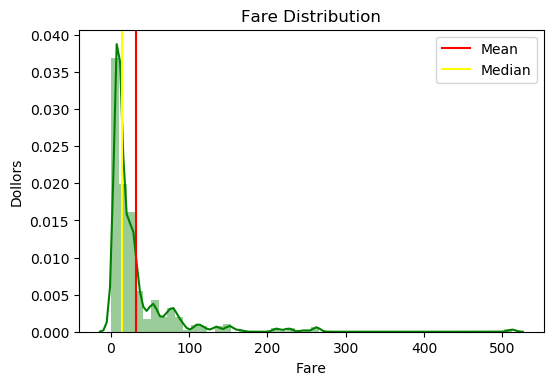

In [4]:
%pylab inline
figure(figsize=(6,4), dpi=100)
d=data_original_df['Fare']
sns.distplot(d, kde=True, color="g")
plt.title('Fare Distribution')
p1=plt.axvline(32.204208,color='red') #mean
p2=plt.axvline(14.4542,color='yellow') #median
plt.legend((p1, p2), ('Mean', 'Median'))
plt.ylabel('Dollors')

As is clear that the distribution of fare is negatively skewed, which definitely agrees with the fact that the 2% possesses the wealth of the 80%. 

### 2.3 Embarkment Distribution
In this section I present the distribution of the ports that people came aboard. Combining with the fare distribution above we can explore some questions later.

In [5]:
print (data_original_df['Embarked'].isnull().sum())          

2


Apparently there exists 2 NA values in column 'Fare', so first I need to decide weather to drop these data or to use some method to fill in the NA values. I will make inference based on fare and embarkment distribution later, but now I just present facts. So for now I exclude those NA values in 'Embarked' column.

In [6]:
data_exclude_nonembark=data_original_df[pd.notnull(data_original_df['Embarked'])]
print (data_exclude_nonembark['Embarked'].isnull().sum())
non_embark=data_exclude_nonembark.groupby(['Embarked']).sum()
non_embark

0


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Num
Embarked,,,,,,,,
C,74820,93,317,4005.92,65,61,10072.2962,168
Q,32178,30,224,786.50,33,13,1022.2543,77
S,289496,217,1514,16312.75,368,266,17439.3988,644


Populating the interactive namespace from numpy and matplotlib


([<matplotlib.axis.XTick at 0x14c4afd0a20>,
 <a list of 3 Text xticklabel objects>)

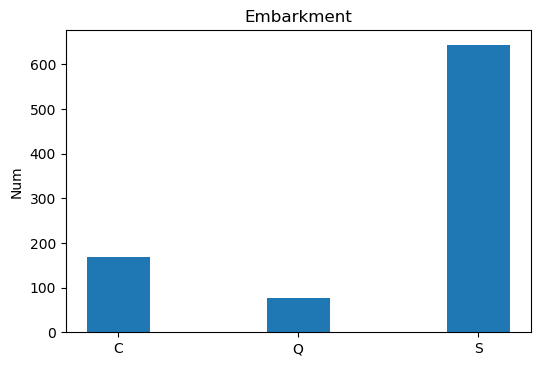

In [7]:
%pylab inline
figure(figsize=(6,4), dpi=100)

d_embark=non_embark['Num']
embark_C =non_embark['Num'].iloc[0]
embark_Q =non_embark['Num'].iloc[1]
embark_S =non_embark['Num'].iloc[2]

ind = np.arange(3)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, d_embark, width)
#p2 = plt.bar(ind, class3_dead, width, bottom=class3_lived)

plt.ylabel('Num')
plt.title('Embarkment')
plt.xticks(ind, ('C', 'Q','S'))

### 2.2 Data Cleaning
First, I need to find exactly whick columns contain NA values and how many.

In [8]:
data_original_df.isnull().sum(axis=0) #using isnull can identify NA values in the df, and sum can calculate how many.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Num              0
dtype: int64

As you can see these values appears in 'Age', 'Cabin' and 'Embark'. Now, I will take a few steps to process these values.

First, for column 'Cabin', there are too much missing values, so whatever we do to fill in the NA would only cause more error, so we should just ignore this column.

### 2.2.1 Fill in NA values in Embarked column
For column 'Emarked', I noticed that 'Fare' of all samples are provided, so it is reasonable to fill in the NA in 'Embarked' column using statistical analysis based on fare distribution.
The core idea is to see what interval would their fares lie in, to do that I present a boxgraph based on class which is certainly an important factor to the fares people spent, and divided according to embarkment of course. Therefore, you can see how much people came aboard from different ports really spent, and how much most people spent in each group.(This method I use here is based on a previous ML project on kaggle: [Exploring Survival on the Titanic](#https://www.kaggle.com/mrisdal/exploring-survival-on-the-titanic/notebook) by Megan Risdal.  

Populating the interactive namespace from numpy and matplotlib


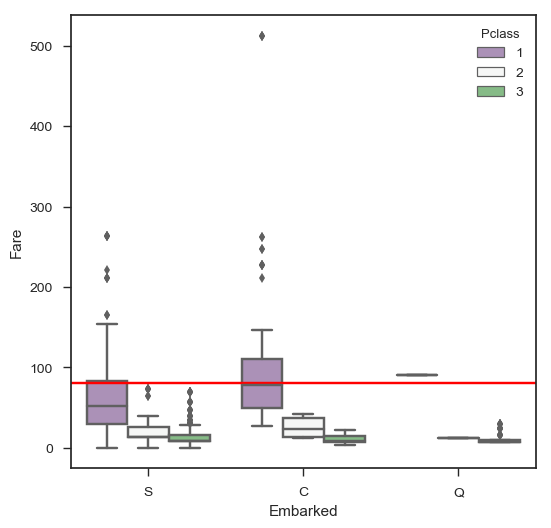

In [9]:
%pylab inline
plt.figure(figsize=(6,6), dpi=100)
sns.set(style="ticks")
# Load the example tips dataset
fares = data_original_df
#print (fares.head())
# Draw a nested boxplot to show fares by class and embarked_port
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=fares, palette="PRGn")
#sns.despine(offset=10, trim=True)
lack_embarked_fare=data_original_df[data_original_df['Embarked'].isnull()]
p1=plt.axhline(lack_embarked_fare['Fare'].median(),color='red') #median of fares of data without embarked values.


As you can see, I printed out the two rows without 'Embarked' values, their fares are both $80, as is presented in the boxgraph. And clearly, the median of the two data without embarkment information is approximately the same with the median of the fare spent by who embarked on C(Charbourg) port to a first class. So we can presume that these two people most probably embarked from C. And so we fill in this finding into the dataframe.

So now, I give embarked value 'C' to the two missing values. In order not to preserve the original data intact, here I used copy function to create a new dataframe to fill in the values.

In [10]:
'''
data_embark_added=data_original_df.copy(deep=True)  
data_embark_added=data_embark_added['Embarked'].fillna('C')
data_embark_added.isnull().sum()
'''

"\ndata_embark_added=data_original_df.copy(deep=True)  \ndata_embark_added=data_embark_added['Embarked'].fillna('C')\ndata_embark_added.isnull().sum()\n"

__Answer to the suggestions on my initial report. 您的反馈中提到我可以使用fillna来进行NA值填充，我在进行代码编写的时候想到过此命令以及其他一些类似的命令。但是我不这么做的原因是如上面标注内的代码，结果只有index 和 Embarked两列，虽然这里不会再用到其他列，但是以后肯定会有很多情况是填充过NA值后还需要进一步利用填充过的完整的dataframe来运算，所以为了保证df的完整我选择了下列填充方法。可以看到其实相比fillna并没有更复杂。另外，下面的dropna也有同样的问题。__

In [11]:
data_embark_added=data_original_df.copy(deep=True)  # use copy to Make a deep copy, including a copy of the data and the indices instead of
print (data_embark_added.head())                    # changing the original data.
data_embark_added[data_embark_added['Embarked'].isnull()]='C'

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Num  
0      0         A/5 21171   7.2500   NaN        S    1  
1      0          PC 17599  71.2833   C85        C    1  
2      0  STON/O2. 3101282   7.9250   NaN        S    1  
3      0            113803  53.1000  C123        S    1  
4      0            373450   8

In [12]:
print (data_embark_added['Embarked'].isnull().sum())           # Just check if the copy function worked.
print (data_original_df['Embarked'].isnull().sum())            # And check if the original data is changed.

0
2


### 2.2.2 Exclude NA values in Age column
For column 'Age', NA values account for 177/891=20% of the whole, so it would be inaccurate if we use statistical analysis to fill in these missing values. Furthermore, to look closer at the data, you can see that for these people missing thier age information, they really can be any ages, there is no correlation or clue that we can use to infere how old these people were. So here I decided to just exclude these data while analyzing patterns related to age.  

In [13]:
# so here I exclude them for later use(when analyzed based on age).
data_exclude_noage=data_original_df[pd.notnull(data_original_df['Age'])]
#data_exclude_noage=overall_data_df.dropna(subset=['Age'])  #same functionality as above.

print (data_exclude_noage.head(8))
print (data_exclude_noage['Age'].max())
print (data_exclude_noage['Age'].min())
print (data_original_df.head(8))            # Just check if the original was changed.

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  femal

In [14]:
grouped_by_sex_survived=data_original_df.groupby(['Sex','Survived']).sum()
print (grouped_by_sex_survived)
grouped_by_sex_survived_df=pd.DataFrame(grouped_by_sex_survived)
print (grouped_by_sex_survived_df['Num'])
class_grouped=data_original_df.groupby(['Pclass','Sex','Survived']).sum()
print (class_grouped)

                 PassengerId  Pclass       Age  SibSp  Parch        Fare  Num
Sex    Survived                                                              
female 0               35223     231   1603.00     98     84   1864.9752   81
       1              100120     447   5683.00    120    120  12101.6876  233
male   0              210189    1159  11382.50    206     97  10277.7447  468
       1               51854     220   2536.67     42     39   4449.5418  109
Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Num, dtype: int64
                        PassengerId      Age  SibSp  Parch       Fare  Num
Pclass Sex    Survived                                                    
1      female 0                 975    77.00      2      4   331.8125    3
              1               43131  2865.00     50     39  9644.0125   91
       male   0               31849  2719.50     21     20  4842.9081   77
              1     

In [15]:
print (grouped_by_sex_survived_df['Num'].iloc[0])

81


## 3. Feature Exploring

### 3.3.1 Pclass&Sex VS Survival Rate
According to the backgroud of the event, Titanic passengers were divided into three separate classes, determined not only by the price of their ticket, but by their wealth. First class passengers were the wealthiest on board, and were mostly business men or politicians. Second class were often professors or authors while third class or steerage was made up of primarily immigrants. All three classes were treated very differently when on board during the trip and after the sinking(see more click [HERE](#https://prezi.com/wb4tx5v4iqql/titanic-class-differences/)). And of course, I imagine women and children were treated with special care during the accident. These are understandable, so I presume that the survival rate among classes and sexes also varied. Therefore I present three stacked bar graphes illustrating how many people survived or passed during the event based on both their classes rank and their sexes.

Populating the interactive namespace from numpy and matplotlib


Text(0.5,1,'Class-3')

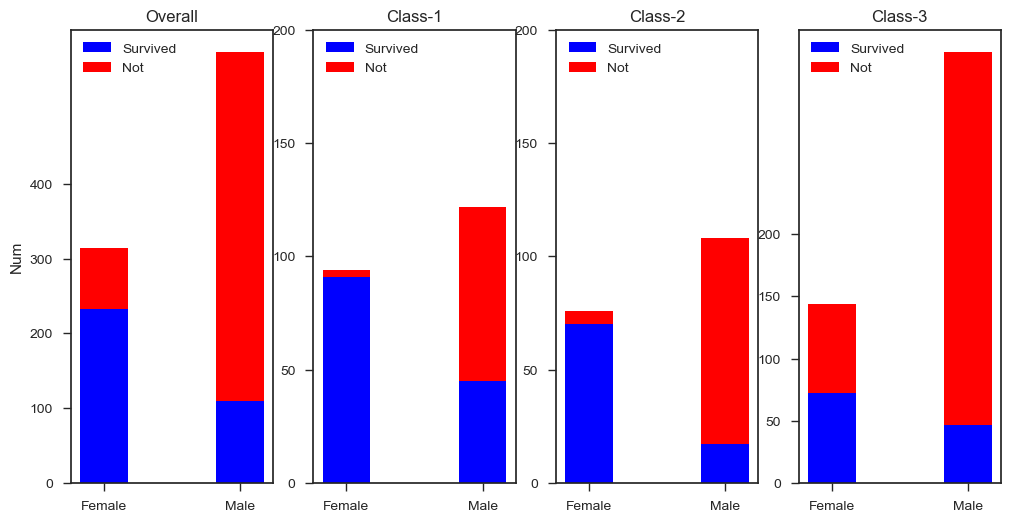

In [16]:
# See the graphes below and you will notice that there are many similar works to be done to match the data while 
# graphing the charts, so I first write a function to do so.
def data_match_survived(data, x):
    new_data=[]
    if x==1:
        new_data.append(data[1])
        new_data.append(data[3])
    else:
        new_data.append(data[0])
        new_data.append(data[2])
    return new_data 

def draw_stacked_bar(x, y1, y2, xticks, yticks):          # Since I will draw three similar graphes, let's define a func first.
    #plt.figure(figsize=(12,6), dpi=100)
    #plt.subplot(1,4,x)
    #N = 2
    ind = np.arange(N)    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence
    p1 = plt.bar(ind, y2, width, color='b')
    p2 = plt.bar(ind, y1, width, color='r', bottom=y2)
    plt.xticks(ind, xticks)
    plt.yticks(yticks)
    plt.legend((p1[0], p2[0]), ('Survived', 'Not'),loc='upper left')
    
#==========================Code for Overall=============================================
%pylab inline
plt.figure(figsize=(12,6), dpi=100)
plt.subplot(1,4,1)
y1=data_match_survived(grouped_by_sex_survived_df['Num'],0)
y2=data_match_survived(grouped_by_sex_survived_df['Num'],1)  
N = 2
draw_stacked_bar(1, y1, y2, ('Female', 'Male'), np.arange(0, 500, 100))
plt.ylabel('Num')
plt.title('Overall')

#===================Code for 2nd plot(class-1 plot)=================================
plt.subplot(1,4,2)
y1 =data_match_survived(class_grouped.loc[1]['Num'],0)
y2 =data_match_survived(class_grouped.loc[1]['Num'],1)
draw_stacked_bar(2, y1, y2, ('Female', 'Male'), np.arange(0, 250, 50))
plt.title('Class-1')
#===================Code for 3rd plot(class-2 plot)=================================
plt.subplot(1,4,3)
y1 =data_match_survived(class_grouped.loc[2]['Num'],0)
y2 =data_match_survived(class_grouped.loc[2]['Num'],1)

draw_stacked_bar(2, y1, y2, ('Female', 'Male'), np.arange(0, 250, 50))
plt.title('Class-2')
#===================Code for 4th plot(class-3 plot)=================================
plt.subplot(1,4,4)
y1 =data_match_survived(class_grouped.loc[3]['Num'],0)
y2 =data_match_survived(class_grouped.loc[3]['Num'],1)

draw_stacked_bar(2, y1, y2, ('Female', 'Male'), np.arange(0, 250, 50))
plt.title('Class-3')


As you can see, the 1st graph on the left shows the overall number of people who survived and died based on their sexes, while the other three demonstrates situations of survival in different classes and their sexes. Clearly, women survived much more in both terms of surviral rate and numbers, which is really a twilight of hunmanity. However, you can also see that more people in the 1st class were survived comparing with those in the other two classes.  
In addition, from the 1st graph we know that women on Titanic survived more than men, both in numbers and in survival rate. And thus we can presume that even in desperate situations, most people do take care of ladies first.

### 3.4 Survival Rate on Age
In this section, I investigate the relationships between survival rate and the age of the people aboard. As I mentioned in section 2, NA values in age account for 20% of the total, so I decide to just exclude them, but only in this part.

In [17]:
data_exclude_noage.groupby(['Age']).sum().head(8)      # exclusion has done in part 2, here I just check.

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Num
Age,,,,,,,
0.42,804,1,3,0,1,8.5167,1
0.67,756,1,2,1,1,14.5000,1
0.75,1115,2,6,4,2,38.5166,2
0.83,911,2,4,1,3,47.7500,2
0.92,306,1,1,1,2,151.5500,1
1.00,2908,5,19,13,11,210.0417,7
2.00,3469,3,26,21,13,375.3625,10
3.00,1632,5,15,11,8,154.6917,6


In [18]:
d_age=data_exclude_noage.groupby(['Age','Survived']).sum()
#print (d_age)
nonage_exclude_survived=data_exclude_noage[data_exclude_noage['Survived']==1]
print (nonage_exclude_survived.head())
nonage_exclude_died=data_exclude_noage[data_exclude_noage['Survived']==0]
d1=nonage_exclude_survived.loc[:,['Age','Num']]
d2=nonage_exclude_died.loc[:,['Age','Num']]
s1=d1.groupby('Age').sum()['Num']
s2=d2.groupby('Age').sum()['Num']
#print (s1)

   PassengerId  Survived  Pclass  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  Num  
1      0          PC 17599  71.2833   C85        C    1  
2      0  STON/O2. 3101282   7.9250   NaN        S    1  
3      0            113803  53.1000  C123        S    1  
8      2            347742  11.1333   NaN        S    1  
9      0            237736  30

C:\Anacoda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'Survival Rate On Age Differences')

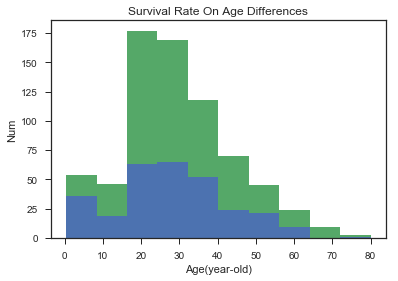

In [19]:
filter = data_exclude_noage["Survived"] ==1 
plt.hist([data_exclude_noage['Age'][filter], data_exclude_noage['Age'][~filter]], stacked=True)
#plt.legend((filter,~filter),('Survived','Not'))
plt.xlabel('Age(year-old)')
plt.ylabel('Num')
plt.title('Survival Rate On Age Differences')
#print (data_exclude_noage[data_exclude_noage['Age']<=10]['Num'].sum(0))

__Q2__: This stacked histgram can be compared with the stacked bar graph above, you can see to draw this is quite simple. But I've tried many ways to add a legend, non of them succeeded, so how can I add a legend in this situation?

### 3.5 Family Survival Rate
In this section, I explored the survival rate based on number of family members, which includes siblings, spouses, parents and children. So first I added a new column that equals to the sum of Parch and Sibsp.

In [20]:
data_family_num=data_original_df.copy(deep=True)   # To avoid changing the original data, here I copied that to a new one.

In [21]:

data_family_num['Family']=data_family_num['Parch']+data_family_num['SibSp']
print (data_family_num.head(15))
data_family_num.groupby(['Family','Survived']).count()           # Just to see the grouped table.

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                

PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
Family Survived                                                              
0      0                 374     374   374  374  274    374    374     374   
       1                 163     163   163  163  130    163    163     163   
1      0                  72      72    72   72   63     72     72      72   
       1                  89      89    89   89   76     89     89      89   
2      0                  43      43    43   43   40     43     43      43   
       1                  59      59    59   59   53     59     59      59   
3      0                   8       8     8    8    6      8      8       8   
       1                  21      21    21   21   21     21     21      21   
4      0                  12      12    12   12    8     12     12      12   
       1                   3       3     3    3    3      3      3       3   
5      0                  19      19    19   19   19     19     19      19   
       1                   3       3     3    3    3      3      3       3   
6      0                   8       8     8    8    8      8      8       8   
       1                   4       4     4    4    4      4      4       4   
7      0                   6       6     6    6    6      6      6       6   
10     0                   7       7     7    7    0      7      7       7   

                 Fare  Cabin  Embarked  Num  
Family Survived                              
0      0          374     39       374  374  
       1          163     55       161  163  
1      0           72     17        72   72  
       1           89     49        89   89  
2      0           43      8        43   43  
       1           59     21        59   59  
3      0            8      2         8    8  
       1           21      7        21   21  
4      0           12      0        12   12  
       1            3      2         3    3  
5      0           19      2        19   19  
       1            3      2         3    3  
6      0            8      0         8    8  
       1            4      0         4    4  
7      0            6      0         6    6  
10     0            7      0         7    7

In [22]:
family01=data_family_num.groupby(['Family','Survived']).count()       # Just to lessen some typing work...


To see the relationship more clearly, I will draw a multi index bar chart, stacked bar chart can work too, but since I've already done one.

In [23]:
# Using x and y to denote variables to draw graph.
x1=family01.iloc[family01.index.get_level_values('Survived') == 1]       
y1=x1['Num']
x2=family01.iloc[family01.index.get_level_values('Survived') == 0]
y2=x2['Num']
print (x1.index.get_level_values('Family'))

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='Family')


Text(0.5,1,'Survival Rate About Family')

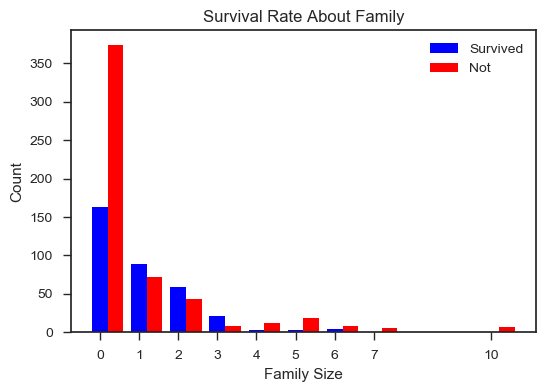

In [24]:
figure(figsize=(6,4), dpi=100)
width = 0.4
b1=plt.bar(x1.index.get_level_values('Family'),y1, width, color='b')
b2=plt.bar(x2.index.get_level_values('Family') +width, y2, width, color='r')
plt.xticks(x2.index.get_level_values('Family'))
plt.legend((b1, b2), ('Survived', 'Not'))
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Survival Rate About Family')

As you can see, as the bigger the family is, the less likely them could survived. And 0 denotes people traveling on their own.  
Here below, I also present the survival rate on male and female in a family. 

Populating the interactive namespace from numpy and matplotlib


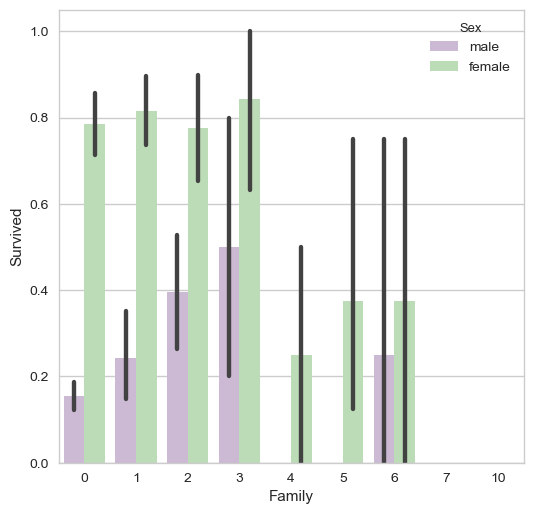

In [25]:
%pylab inline
plt.figure(figsize=(6,6), dpi=100)
sns.set(style="whitegrid")
sns.barplot(x='Family', y="Survived", hue="Sex", data=data_family_num, palette="PRGn")
#sns.despine(offset=10, trim=True)

And you can see that female tend to have a bigger survival rate in the event.

### 3.6 Class VS Survival Rate
最初版本只提供了class+sex和survival的情况，而没有拆开分别研究。这里进行补充。sex vs survival的情况可见class&sex vs survival的第一幅图。  
To investigate the relationship between class and survival rate, we have to first standardize the survived column into survival rate, because as is suggested before, the population among these three class are not equal.

Populating the interactive namespace from numpy and matplotlib


Text(0.5,1,'Survival Rate About Class')

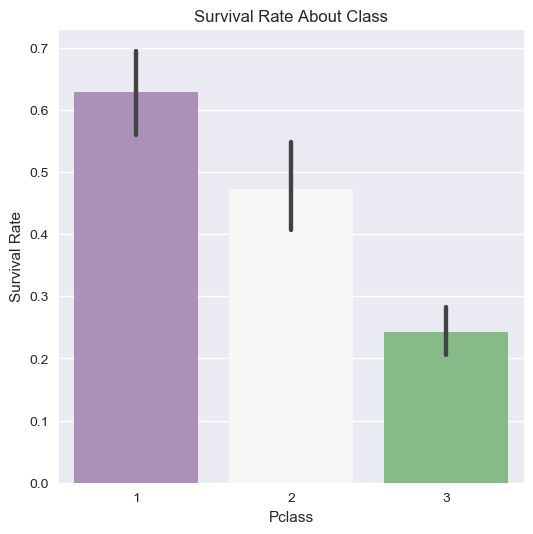

In [26]:
%pylab inline
plt.figure(figsize=(6,6), dpi=100)
sns.set(style="darkgrid")
sns.barplot(x='Pclass', y="Survived", data=data_family_num, palette="PRGn")
#sns.despine(offset=10, trim=True)
plt.ylabel('Survival Rate')
plt.title('Survival Rate About Class')

As you can see that the better class level people got, the bigger chances they would survive, it was because 1st class guests were treated more specially while poor people in class 3 didn't get much attention and care, especially under such circumstances. So to better deal with these situation, to improve survival rate, we need to treat people of different origins equally not necessarily in terms of services they enjoy aboard, but in terms of survival infrastructures and the access to lifeboats and others. 

## 4. Correlation
As the analyses suggested in the 3rd part above, we can see that the survival rate are affected by many factors. Perticularly, relations between fares people spent and family menbers seemed more strong, to verify this, I will calculate the Pearson's R to make further investigation.

### 4.1 Correlation between fares and survival rate.


__这里为修改： 由于fare是相对联系变量， 但是又非随时间变化或其他增长型变量， 所以采用折线图并不合适。这里改为分组的bar graph 用cut()指令。__  
先求出fare的范围，来确定大致如何设置bin size.

In [27]:
print (data_original_df['Fare'].min())
data_original_df['Fare'].max()

0.0


512.32920000000001

In [28]:
bins= np.arange(0, 550, 50)
data_survival_rate1=data_original_df.copy(deep=True)
data_survival_rate1['Fare_group']=pd.cut(data_survival_rate1['Fare'],bins)
data_survival_rate1.groupby('Fare_group')['PassengerId'].count()

Fare_group
(0, 50]       716
(50, 100]     107
(100, 150]     24
(150, 200]      9
(200, 250]     11
(250, 300]      6
(300, 350]      0
(350, 400]      0
(400, 450]      0
(450, 500]      0
Name: PassengerId, dtype: int64

Fare_group
(0, 50]       0.324022
(50, 100]     0.654206
(100, 150]    0.791667
(150, 200]    0.666667
(200, 250]    0.636364
Name: Survived, dtype: float64


Text(0.5,1,'Survival Rate vs Fares')

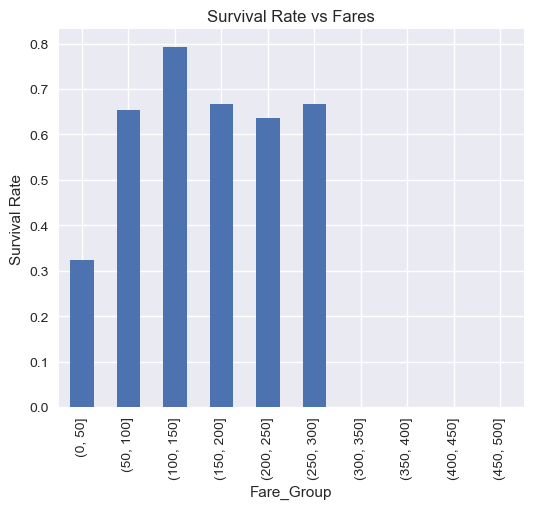

In [29]:
print (data_survival_rate1.groupby('Fare_group')['Survived'].mean().head())    #这里对survived直接求平均即可得到rate.
plt.figure(figsize=(6,5), dpi=100)
data_survival_rate1.groupby('Fare_group')['Survived'].mean().plot(kind='bar')
plt.xlabel('Fare_Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate vs Fares')

改为分组的bar graph后可以看出fare和survival rate之间并没有明显的关系。

Though, the Pearson's R suggests that fares and survival rate enjoys a negative relation, I would say that's in large proportion due to inequal distribution of the population. As is presented in part 2, fares' graph is negatively skewed so most people paied relatively small fares while only a small group of people paied much. So I would conclude that this relationship is void.

### 4.2 Correlation between family and survival rate.
I have made a histgram above, on which I observed a relationship. So here I will calculation the Pearson's R to see how deep this relationship is in depth.

Again, I first add a survival rate column to the data, and to avoid changing the original one I first created a new dataframe using copy.

In [30]:
data_survivalrate_family=data_family_num.copy(deep=True)
data_survivalrate_family['Sur-rate']=data_survivalrate_family['Num']/891
family_grouped_survival_rate=data_survivalrate_family.groupby('Family').sum()
print (family_grouped_survival_rate.head())

        PassengerId  Survived  Pclass       Age  SibSp  Parch        Fare  \
Family                                                                      
0            245946       163    1289  13017.00      0      0  11407.3238   
1             66467        89     309   4363.42    123     38   8032.9547   
2             45732        59     227   2421.33     89    115   4048.6332   
3             14916        21      60    493.42     39     48   1591.0708   
4              5518         3      40    229.00     32     28    871.4168   

        Num  Sur-rate  
Family                 
0       537  0.602694  
1       161  0.180696  
2       102  0.114478  
3        29  0.032548  
4        15  0.016835  


Text(0.5,1,'Survival Rate About Family')

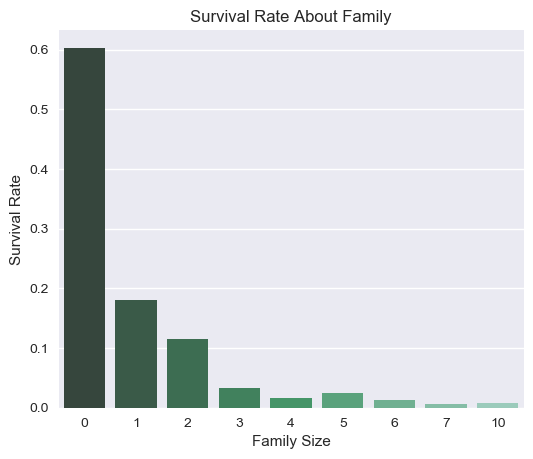

In [31]:
plt.figure(figsize=(6,5), dpi=100)
x=family_grouped_survival_rate.index.get_level_values('Family')
y=family_grouped_survival_rate['Sur-rate']
sns.barplot(x, y, palette="BuGn_d")
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.title('Survival Rate About Family')

In [32]:
from scipy.stats.stats import pearsonr
pearsonr(family_grouped_survival_rate.index.get_level_values('Family'),family_grouped_survival_rate['Fare'])

(-0.79628805493277122, 0.010228146142421837)

According to the Pearson's R, which is presented in the form of (Pearson's correlation coefficient, 2-tailed p-value). It is clear that the bigger the family is, the less they are likely to survive in a situation like this.   
因为family size非连续变量，所以改为barchart.

### 4.3 Conclusion
Combining part2, part3 and part4, I've investigated survival rates varying according to ages, family members, sexes and fares people paied. And some relationships are rather clear while others may be not. Anyway, there are many limitaions in this process, like the data we use is merely a sample, and to investigate how those factors affect survival rate would need more than data but more about human reasons. Even though I have drawn graphes to illustrate relations between sex and survival or others, I've learned a little about the event that it was human error that caused the accident and it was some staffs' selfishness that caused so much loss after the hit( [Titanic](#https://en.wikipedia.org/wiki/RMS_Titanic)). So by doing this investigation, we can present a macro picture of the people aboard while to improve survival rate in later days, we have to start from human ourselves.

# 5. Summary
I have to addmit that project-2 is rather complicated than p1. In p1 all I need were provided in detail in the lessons, while in p2, I have to look up more, which is definitely a good thing. I've not only discovery much more interesting websites about data science like 'kaggle', but I also learned much more on how to resolve an issue while encounting a problem, for instance, to look up the 'stackoverflow' site.  
And fianlly, since this is the very 1st full project on jupyter using python and pandas etc, there must be many many mistakes and foolish steps, but I still want to know that in general, if you were to give a score to this report on a 100 scale how much would you give? And what is my level among peers that have been submitted their reports?   
THANK YOU!  
2017.12.14.  
by Xavier J